In [1]:
from collections import Counter

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS 

from scipy.sparse import hstack

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os
print(os.listdir("data/"))

['test-unbalanced.csv', 'train-balanced-sarcasm.csv', 'test-balanced.csv']


In [2]:
PATH = 'data/'

In [3]:
train = pd.read_csv(PATH + 'train-balanced-sarcasm.csv')
test = pd.read_csv(PATH + 'test-unbalanced.csv')

In [4]:
train.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,2016-10-23 21:43:03,What's your weird or unsettling Trick or Treat...
7,0,Blade Mastery+Masamune or GTFO!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,2016-10-13 21:13:55,Probably Sephiroth. I refuse to taint his grea...
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,2016-10-27 19:11:06,What to upgrade? I have $500 to spend (mainly ...
9,0,I would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,2016-11-21 23:39:12,Probably count Kanye out Since the rest of his...


In [5]:
train.isna().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [6]:
train_without_na = train.dropna(subset=['comment'])

In [7]:
train_without_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
label             1010773 non-null int64
comment           1010773 non-null object
author            1010773 non-null object
subreddit         1010773 non-null object
score             1010773 non-null int64
ups               1010773 non-null int64
downs             1010773 non-null int64
date              1010773 non-null object
created_utc       1010773 non-null object
parent_comment    1010773 non-null object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


In [8]:
train.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


In [9]:
train_without_na.shape

(1010773, 10)

In [10]:
train_without_na['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

In [11]:
train_without_na['author'].value_counts()

Biffingston           845
pokemon_fetish        432
NeonDisease           422
ShyBiDude89           404
ivsciguy              342
mad-n-fla             318
mindlessrabble        302
Canada_girl           300
Chaoslab              252
sleaze_bag_alert      251
tau-lepton            246
Bipolarruledout       238
IrishJoe              236
gonzone               226
InFearn0              216
DownvoteDaemon        200
kurisu7885            200
JumpingJazzJam        199
TheBigBadDuke         186
EMINEM_4Evah          184
TodaysIllusion        178
pixelwhip             176
IMJGalt               174
richardleosimones     170
staiano               162
TouchMeHerePls        158
ghostofpennwast       152
TheRighteousTyrant    150
duggtodeath           144
ozric101              144
                     ... 
TheRokerr               1
Krakitoa                1
rr745263                1
alfyboza                1
Me_The_Beekeeper        1
mushtazm                1
lilywhite1              1
ulag        

In [12]:
train_without_na.groupby('author')['label'].agg([np.size, np.mean, np.sum]).sort_values(by='sum', ascending=False)

,size,mean,sum
author,,,
Biffingston,845,0.499408,422
pokemon_fetish,432,0.500000,216
NeonDisease,422,0.500000,211
ShyBiDude89,404,0.500000,202
ivsciguy,342,0.500000,171
mad-n-fla,318,0.500000,159
mindlessrabble,302,0.500000,151
Canada_girl,300,0.500000,150
Chaoslab,252,0.500000,126


In [13]:
train_without_na.groupby('subreddit')['label'].agg([np.size, np.mean, np.sum]).sort_values(by='sum', ascending=False)

,size,mean,sum
subreddit,,,
AskReddit,65674,0.401453,26365
politics,39493,0.605348,23907
worldnews,26376,0.642516,16947
leagueoflegends,21034,0.542312,11407
pcmasterrace,18987,0.566651,10759
news,16891,0.603457,10193
funny,17939,0.451474,8099
pics,16152,0.484336,7823
todayilearned,14159,0.547567,7753


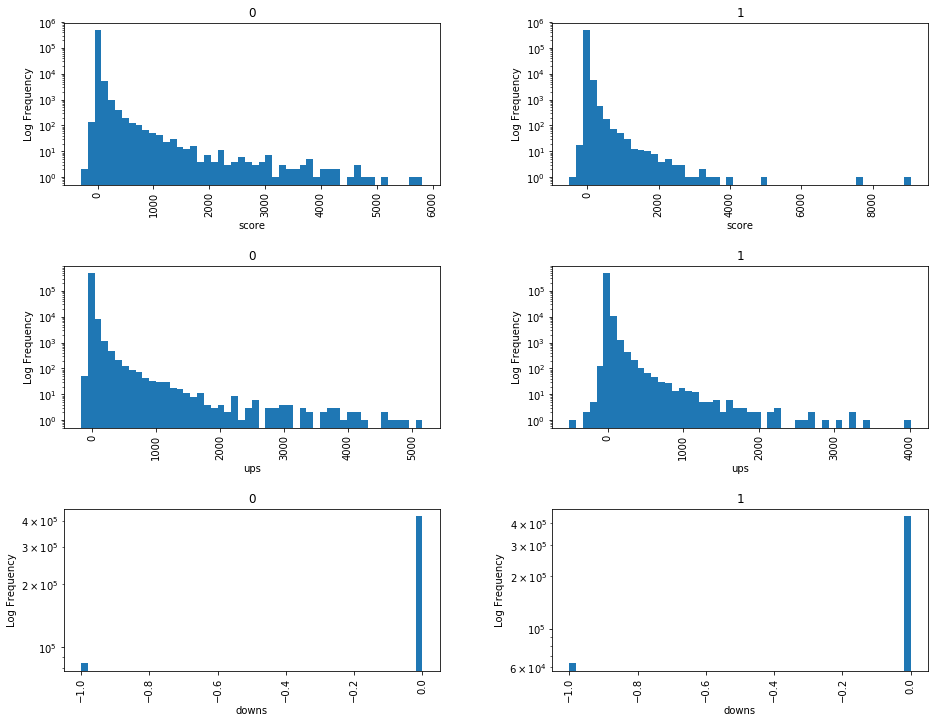

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=2, squeeze=False, figsize=(15, 12))

feature_id = 0

feature_list = ['score', 'ups', 'downs']

for row in ax:
    feature = feature_list[feature_id]
    
    axes = row.flatten()
    train_without_na.hist(ax=axes, column=feature, by='label', bins=50, log=True)

    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Log Frequency')

    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Log Frequency')

    feature_id += 1

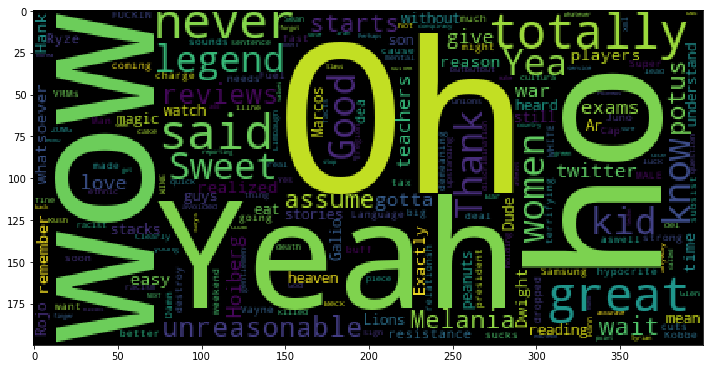

In [15]:
sarcastic_comments = str(train_without_na[train_without_na['label'] == 1]['comment'])
plt.figure(figsize=(12, 12))
word_cloud = WordCloud(stopwords=STOPWORDS)
word_cloud.generate(sarcastic_comments)
plt.imshow(word_cloud)

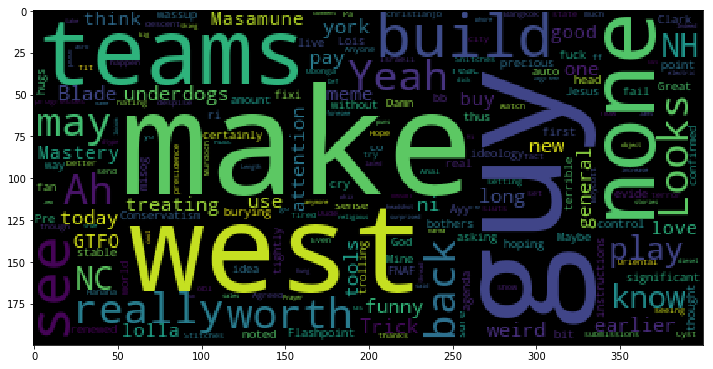

In [16]:
sincere_comments = str(train_without_na[train_without_na['label'] == 0]['comment'])
plt.figure(figsize=(12, 12))
word_cloud = WordCloud(stopwords=STOPWORDS)
word_cloud.generate(sincere_comments)
plt.imshow(word_cloud)

In [17]:
train_removed_features = train_without_na.iloc[:, :-3].drop('author', axis=1)
train_removed_features.head(10)

,label,comment,subreddit,score,ups,downs
0,0,NC and NH.,politics,2,-1,-1
1,0,You do know west teams play against west teams...,nba,-4,-1,-1
2,0,"They were underdogs earlier today, but since G...",nfl,3,3,0
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,-8,-1,-1
4,0,I could use one of those tools.,MaddenUltimateTeam,6,-1,-1
5,0,"I don't pay attention to her, but as long as s...",AskReddit,0,0,0
6,0,Trick or treating in general is just weird...,AskReddit,1,-1,-1
7,0,Blade Mastery+Masamune or GTFO!,FFBraveExvius,2,-1,-1
8,0,"You don't have to, you have a good build, buy ...",pcmasterrace,1,-1,-1
9,0,I would love to see him at lolla.,Lollapalooza,2,-1,-1


In [18]:
train_x, train_y = train_removed_features.drop('label', axis=1), train_removed_features[['label']]

In [25]:
Counter([word for word in str(train_x['comment']).split(' ') if word not in STOPWORDS])

Counter({'0': 1,
         '': 1229,
         'NC': 1,
         'NH.\n1': 1,
         'You': 2,
         'know': 1,
         'west': 2,
         'teams': 1,
         'play': 1,
         'teams...\n2': 1,
         'They': 2,
         'underdogs': 1,
         'earlier': 1,
         'today,': 1,
         'G...\n3': 1,
         'This': 3,
         'meme': 1,
         'funny': 1,
         'none': 1,
         '"new': 1,
         'york': 1,
         'ni...\n4': 1,
         'I': 11,
         'use': 1,
         'one': 1,
         'tools.\n5': 1,
         'pay': 1,
         'attention': 1,
         'her,': 1,
         'long': 1,
         's...\n6': 1,
         'Trick': 1,
         'treating': 1,
         'general': 1,
         'weird...\n7': 1,
         'Blade': 1,
         'Mastery+Masamune': 1,
         'GTFO!\n8': 1,
         'to,': 1,
         'good': 2,
         'build,': 1,
         'buy': 1,
         '...\n9': 1,
         'love': 1,
         'see': 1,
         'lolla.\n10': 1,
         'th

In [44]:
tfidf_comment = TfidfVectorizer(ngram_range=(1, 2), max_features=None)
comment_sparse = tfidf_comment.fit_transform(train_x['comment'])

In [45]:
tfidf_subreddit = TfidfVectorizer(ngram_range=(1, 1), max_features=None)
subreddit_sparse = tfidf_comment.fit_transform(train_x['subreddit'])

In [46]:
print(len(tfidf_comment.vocabulary_))

14878


In [47]:
cont_var = train_x.iloc[:,-3:]
scaler = StandardScaler()
scaled_cont_var = scaler.fit_transform(cont_var)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
train_x_sparse = hstack([comment_sparse, subreddit_sparse, scaled_cont_var])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(train_x_sparse, train_y)

In [50]:
clf = LogisticRegression(solver='liblinear', verbose=True)

In [51]:
clf.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=True, warm_start=False)

In [52]:
clf.score(x_train, y_train)

0.824772879871359

In [53]:
clf.score(x_test, y_test)

0.7286322587793933

In [54]:
y_pred = clf.predict(x_test)

In [55]:
cf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)

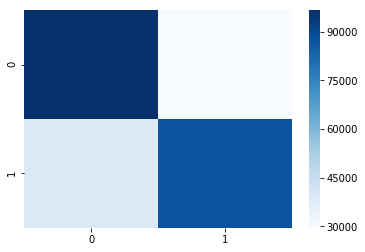

In [56]:
sns.heatmap(cf_matrix, cmap='Blues')